The exercise is as follows: 
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

Data set is taken from https://raw.githubusercontent.com/manishanker/statistics_ML_jan_2020/master/bank.csv
More info about the data set : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import numpy as np
import pandas as pd

### Data Loading...

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/manishanker/statistics_ML_jan_2020/master/bank.csv', sep = ';')
df

age            job  marital  education default balance housing loan  \
0      30     unemployed  married    primary      no    1787      no   no   
1      33       services  married  secondary      no    4789     yes  yes   
2      35     management   single   tertiary      no    1350     yes   no   
3      30     management  married   tertiary      no    1476     yes  yes   
4      59    blue-collar  married  secondary      no       0     yes   no   
...   ...            ...      ...        ...     ...     ...     ...  ...   
4516   33       services  married  secondary      no    -333     yes   no   
4517   57  self-employed  married   tertiary     yes   -3313     yes  yes   
4518   57     technician  married  secondary      no     295      no   no   
4519   28    blue-collar  married  secondary      no    1137      no   no   
4520   44            NaN      NaN   tertiary      no    1136     yes  yes   

       contact   day month  duration  campaign  pdays  previous poutcome   y  
0     cellular  19.0   oct      79.0         1     -1         0  unknown  no  
1     cellular  11.0   may     220.0         1    339         4  failure  no  
2     cellular  16.0   apr     185.0         1    330         1  failure  no  
3      unknown   3.0   jun     199.0         4     -1         0  unknown  no  
4      unknown   5.0   may     226.0         1     -1         0  unknown  no  
...        ...   ...   ...       ...       ...    ...       ...      ...  ..  
4516  cellular  30.0   jul     329.0         5     -1         0  unknown  no  
4517   unknown   9.0   may     153.0         1     -1         0  unknown  no  
4518  cellular  19.0   aug     151.0        11     -1         0  unknown  no  
4519  cellular   6.0   feb     129.0         4    211         3    other  no  
4520       NaN   3.0   apr       NaN         2    249         7    other  no  

[4521 rows x 17 columns]

In [3]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

#### 'y' is the target variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4518 non-null object
marital      4518 non-null object
education    4518 non-null object
default      4521 non-null object
balance      4520 non-null object
housing      4520 non-null object
loan         4521 non-null object
contact      4518 non-null object
day          4520 non-null float64
month        4521 non-null object
duration     4519 non-null float64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4518 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 600.6+ KB


In [5]:
df.describe()

age          day     duration     campaign        pdays  \
count  4521.000000  4520.000000  4519.000000  4521.000000  4521.000000   
mean     41.170095    15.915487   263.984952     2.793630    39.766645   
std      10.576211     8.248569   259.896301     3.109807   100.121124   
min      19.000000     1.000000     4.000000     1.000000    -1.000000   
25%      33.000000     9.000000   104.000000     1.000000    -1.000000   
50%      39.000000    16.000000   185.000000     2.000000    -1.000000   
75%      49.000000    21.000000   329.000000     3.000000    -1.000000   
max      87.000000    31.000000  3025.000000    50.000000   871.000000   

          previous  
count  4521.000000  
mean      0.542579  
std       1.693562  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      25.000000

### Data Cleaning Starts

In [6]:
df.isna().sum()

age          0
job          3
marital      3
education    3
default      0
balance      1
housing      1
loan         0
contact      3
day          1
month        0
duration     2
campaign     0
pdays        0
previous     0
poutcome     0
y            3
dtype: int64

#### Remove the rows where the target variable is null(NAN)

In [7]:
df = df[df['y'].notnull()]

In [8]:
df['y'].value_counts()

no     3988
yes     519
No        6
NO        3
Yes       1
yEs       1
Name: y, dtype: int64

#### Convert all (no, No, NO) to 'no' and all (yes, yEs, Yes) to 'yes'

In [9]:
df['y'] = df['y'].map(lambda x: x.lower())

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df['y'].value_counts()

no     3997
yes     521
Name: y, dtype: int64

#### Cleaned 'y' column

In [11]:
df.job.value_counts()

management       968
blue-collar      944
technician       767
admin.           477
services         417
retired          230
self-employed    183
entrepreneur     167
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

#### Fill 'unknown' in all 'job' where 'job' is null

In [12]:
df['job'].fillna('unknown', inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [13]:
df['marital'].value_counts(normalize = True)

married     0.619269
single      0.264230
divorced    0.116501
Name: marital, dtype: float64

#### Considering na values as married as more than 50% are married.

In [14]:
df['marital'].fillna('married', inplace=True)

In [15]:
df['education'].value_counts()

secondary    2302
tertiary     1349
primary       675
unknown       187
na              2
Name: education, dtype: int64

In [16]:
df[df['education'] == 'na']

age          job  marital education default balance housing loan  \
363   49  blue-collar  married        na      no    2039     yes   no   
398   38  blue-collar  married        na      no     168     yes  yes   

       contact   day month  duration  campaign  pdays  previous poutcome   y  
363   cellular  18.0   nov     283.0         2     -1         0  unknown  no  
398  telephone  13.0   may     212.0         3     -1         0  unknown  no

#### Converting 'na' to 'unknown' as in the data info, there is no such thing as 'na'

In [17]:
df.loc[363, 'education'] = 'unknown'
df.loc[398, 'education'] = 'unknown'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [18]:
df['education'].value_counts()

secondary    2302
tertiary     1349
primary       675
unknown       189
Name: education, dtype: int64

In [19]:
df['education'].fillna('unknown', inplace=True)

#### Filling 0 in all 'balance' where balance is null

In [20]:
df['balance'].fillna(0, inplace = True)

In [21]:
df['housing'].value_counts(normalize=True)

yes    0.565641
no     0.434359
Name: housing, dtype: float64

#### Filling null value with yes as more than 50% are yes.

In [22]:
df['housing'].fillna('yes', inplace = True)

In [23]:
df.contact.value_counts()

cellular     2892
unknown      1322
telephone     301
Name: contact, dtype: int64

In [24]:
df['contact'].fillna('unknown', inplace = True)

In [25]:
df['duration'].fillna(0, inplace=True)

In [26]:
df.day.value_counts(normalize='True')

20.0    0.056896
18.0    0.050033
19.0    0.044499
21.0    0.043834
14.0    0.043170
17.0    0.042285
7.0     0.042063
6.0     0.041399
5.0     0.040071
28.0    0.039849
8.0     0.039849
29.0    0.038521
15.0    0.038300
30.0    0.037193
13.0    0.036529
16.0    0.036307
9.0     0.036086
11.0    0.033651
12.0    0.033429
4.0     0.030773
2.0     0.025238
27.0    0.025017
26.0    0.024352
3.0     0.023246
23.0    0.022581
22.0    0.019039
25.0    0.017711
31.0    0.013062
10.0    0.011069
24.0    0.007970
1.0     0.005977
Name: day, dtype: float64

#### Filling 20.0 in 'day' where day is null

In [27]:
df.day.fillna(20.0, inplace=True)

In [28]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Data set cleaning done

In [29]:
df.describe()

age          day     duration     campaign        pdays  \
count  4518.000000  4518.000000  4518.000000  4518.000000  4518.000000   
mean     41.170651    15.911465   263.802346     2.794378    39.793714   
std      10.575822     8.246246   259.945440     3.110680   100.148853   
min      19.000000     1.000000     0.000000     1.000000    -1.000000   
25%      33.000000     9.000000   104.000000     1.000000    -1.000000   
50%      39.000000    16.000000   185.000000     2.000000    -1.000000   
75%      49.000000    21.000000   329.000000     3.000000    -1.000000   
max      87.000000    31.000000  3025.000000    50.000000   871.000000   

          previous  
count  4518.000000  
mean      0.542939  
std       1.694067  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max      25.000000

### Exploratory Data Analysis

#### Pearson Correlation

In [30]:
pearsoncorr = df.corr()
pearsoncorr

age       day  duration  campaign     pdays  previous
age       1.000000 -0.017543 -0.002630 -0.005097 -0.008919 -0.003529
day      -0.017543  1.000000 -0.024546  0.161018 -0.094216 -0.058998
duration -0.002630 -0.024546  1.000000 -0.068208  0.009762  0.017024
campaign -0.005097  0.161018 -0.068208  1.000000 -0.093245 -0.067916
pdays    -0.008919 -0.094216  0.009762 -0.093245  1.000000  0.577527
previous -0.003529 -0.058998  0.017024 -0.067916  0.577527  1.000000

In [31]:
import seaborn as sb

%matplotlib inline

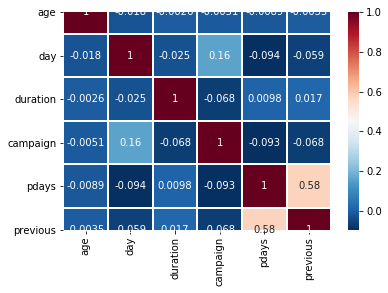

In [32]:
sb.heatmap(pearsoncorr, xticklabels=pearsoncorr.columns, 
           yticklabels=pearsoncorr.columns, 
           cmap='RdBu_r', annot=True, linewidth=0.8)

#### Strip Plot

/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:2775: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


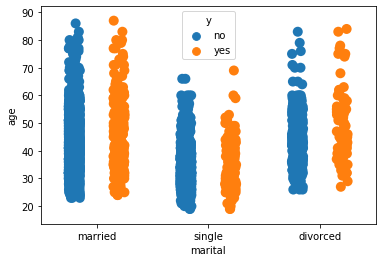

In [41]:
sb.stripplot(x = 'marital', y='age', data=df, hue='y', split = True, size = 10)

#### Box Plot

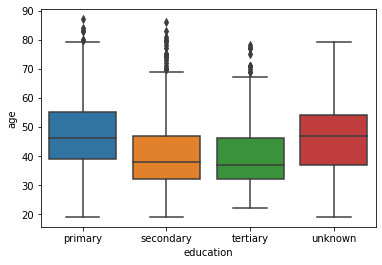

In [45]:
sb.boxplot(x = 'education', y='age', data = df)

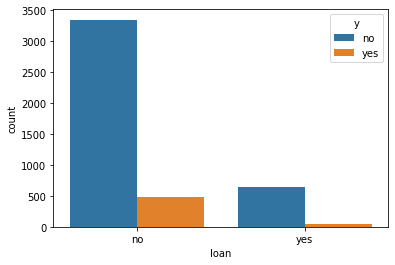

In [51]:
sb.countplot(x = 'loan', data = df, hue = 'y')

#### A large portion of the people who don't have personal loan have not subscribed to the term deposit.

### Converting categorical values to numerical values...

In [53]:
job = pd.get_dummies(df['job'], drop_first=True)
job

blue-collar  entrepreneur  housemaid  management  retired  \
0               0             0          0           0        0   
1               0             0          0           0        0   
2               0             0          0           1        0   
3               0             0          0           1        0   
4               1             0          0           0        0   
...           ...           ...        ...         ...      ...   
4516            0             0          0           0        0   
4517            0             0          0           0        0   
4518            0             0          0           0        0   
4519            1             0          0           0        0   
4520            0             0          0           0        0   

      self-employed  services  student  technician  unemployed  unknown  
0                 0         0        0           0           1        0  
1                 0         1        0           0           0        0  
2                 0         0        0           0           0        0  
3                 0         0        0           0           0        0  
4                 0         0        0           0           0        0  
...             ...       ...      ...         ...         ...      ...  
4516              0         1        0           0           0        0  
4517              1         0        0           0           0        0  
4518              0         0        0           1           0        0  
4519              0         0        0           0           0        0  
4520              0         0        0           0           0        1  

[4518 rows x 11 columns]

In [54]:
marital = pd.get_dummies(df['marital'], drop_first=True)
marital

married  single
0           1       0
1           1       0
2           0       1
3           1       0
4           1       0
...       ...     ...
4516        1       0
4517        1       0
4518        1       0
4519        1       0
4520        1       0

[4518 rows x 2 columns]

In [55]:
education = pd.get_dummies(df['education'], drop_first = True)
education

secondary  tertiary  unknown
0             0         0        0
1             1         0        0
2             0         1        0
3             0         1        0
4             1         0        0
...         ...       ...      ...
4516          1         0        0
4517          0         1        0
4518          1         0        0
4519          1         0        0
4520          0         1        0

[4518 rows x 3 columns]

In [56]:
education.columns = ['edu_secondary', 'edu_tertiary', 'edu_unknown']
education

edu_secondary  edu_tertiary  edu_unknown
0                 0             0            0
1                 1             0            0
2                 0             1            0
3                 0             1            0
4                 1             0            0
...             ...           ...          ...
4516              1             0            0
4517              0             1            0
4518              1             0            0
4519              1             0            0
4520              0             1            0

[4518 rows x 3 columns]

In [57]:
default = pd.get_dummies(df['default'], drop_first=True)
default.columns = ['default_yes']
default

default_yes
0               0
1               0
2               0
3               0
4               0
...           ...
4516            0
4517            1
4518            0
4519            0
4520            0

[4518 rows x 1 columns]

In [58]:
housing = pd.get_dummies(df['housing'], drop_first = True)
housing.columns = ['housing_yes']
housing

housing_yes
0               0
1               1
2               1
3               1
4               1
...           ...
4516            1
4517            1
4518            0
4519            0
4520            1

[4518 rows x 1 columns]

In [59]:
loan = pd.get_dummies(df['loan'], drop_first=True)
loan.columns = ['loan_yes']
loan

loan_yes
0            0
1            1
2            0
3            1
4            0
...        ...
4516         0
4517         1
4518         0
4519         0
4520         1

[4518 rows x 1 columns]

In [60]:
poutcome = pd.get_dummies(df['poutcome'])
poutcome.columns = ['poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']
poutcome

poutcome_failure  poutcome_other  poutcome_success  poutcome_unknown
0                    0               0                 0                 1
1                    1               0                 0                 0
2                    1               0                 0                 0
3                    0               0                 0                 1
4                    0               0                 0                 1
...                ...             ...               ...               ...
4516                 0               0                 0                 1
4517                 0               0                 0                 1
4518                 0               0                 0                 1
4519                 0               1                 0                 0
4520                 0               1                 0                 0

[4518 rows x 4 columns]

#### Got dummies job, marital, education, default, housing, loan, poutcome

In [61]:
df = pd.concat([df, job, marital, education, default, housing, loan, poutcome], axis = 1)

In [62]:
df.head()

age          job  marital  education default balance housing loan  \
0   30   unemployed  married    primary      no    1787      no   no   
1   33     services  married  secondary      no    4789     yes  yes   
2   35   management   single   tertiary      no    1350     yes   no   
3   30   management  married   tertiary      no    1476     yes  yes   
4   59  blue-collar  married  secondary      no       0     yes   no   

    contact   day  ... edu_secondary  edu_tertiary  edu_unknown  default_yes  \
0  cellular  19.0  ...             0             0            0            0   
1  cellular  11.0  ...             1             0            0            0   
2  cellular  16.0  ...             0             1            0            0   
3   unknown   3.0  ...             0             1            0            0   
4   unknown   5.0  ...             1             0            0            0   

   housing_yes loan_yes poutcome_failure  poutcome_other  poutcome_success  \
0            0        0                0               0                 0   
1            1        1                1               0                 0   
2            1        0                1               0                 0   
3            1        1                0               0                 0   
4            1        0                0               0                 0   

   poutcome_unknown  
0                 1  
1                 0  
2                 0  
3                 1  
4                 1  

[5 rows x 40 columns]

#### Saving data set...

In [63]:
df.to_csv('Cleaned_assignment_data.csv')

#### Drop all columns which are converted to dummies or aren't impacting the target variable like day,month.

In [64]:
df.drop(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'poutcome'], axis = 1, inplace = True)

In [65]:
target = df['y']
target

0       no
1       no
2       no
3       no
4       no
        ..
4516    no
4517    no
4518    no
4519    no
4520    no
Name: y, Length: 4518, dtype: object

#### Define a function to convert the 'yes' to 1 and 'no' to 0 in target variable

In [66]:
def targetVarMapping(x):
    if x == 'no':
        return 0
    return 1

In [67]:
target = target.map(lambda x : targetVarMapping(x))

In [68]:
target.value_counts()

0    3997
1     521
Name: y, dtype: int64

#### Dropping the target variable column after getting it in separate variable

In [69]:
filtered_bank_data_set = df.drop(['y'], axis = 1)

In [70]:
filtered_bank_data_set.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous',
       'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired',
       'self-employed', 'services', 'student', 'technician', 'unemployed',
       'unknown', 'married', 'single', 'edu_secondary', 'edu_tertiary',
       'edu_unknown', 'default_yes', 'housing_yes', 'loan_yes',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

### Data prediction starts...

### 1. Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Split the data into train and test in 70:30 ratio

In [72]:
x_train,x_test,y_train,y_test = train_test_split(filtered_bank_data_set, target, test_size = 0.3, stratify = target)

In [73]:
model = LogisticRegression()

In [74]:
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'MANI'

#### Data contains string 'MANI' somewhere

In [75]:
filtered_bank_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4518 entries, 0 to 4520
Data columns (total 29 columns):
age                 4518 non-null int64
balance             4518 non-null object
duration            4518 non-null float64
campaign            4518 non-null int64
pdays               4518 non-null int64
previous            4518 non-null int64
blue-collar         4518 non-null uint8
entrepreneur        4518 non-null uint8
housemaid           4518 non-null uint8
management          4518 non-null uint8
retired             4518 non-null uint8
self-employed       4518 non-null uint8
services            4518 non-null uint8
student             4518 non-null uint8
technician          4518 non-null uint8
unemployed          4518 non-null uint8
unknown             4518 non-null uint8
married             4518 non-null uint8
single              4518 non-null uint8
edu_secondary       4518 non-null uint8
edu_tertiary        4518 non-null uint8
edu_unknown         4518 non-null uint8
default_ye

#### All columns are integers,float except balance, so balance must be having the string value 'MANI'

In [76]:
filtered_bank_data_set.balance.value_counts()

0        357
2         24
1         15
4         13
5         11
        ... 
2400       1
1783       1
1149       1
-2082      1
0          1
Name: balance, Length: 2351, dtype: int64

#### A function to determine whether a integer or not

In [77]:
def isInt(x):
    try:
        int(x)
        return True
    except ValueError:
        return False

#### Get all rows which don't have integer in balance column

In [78]:
filtered_bank_data_set[True == filtered_bank_data_set['balance'].map(lambda x : not isInt(x))]

age balance  duration  campaign  pdays  previous  blue-collar  \
2537   26    MANI     246.0         3     -1         0            1   
2543   37    MANI     204.0         1     -1         0            0   

      entrepreneur  housemaid  management  ...  edu_secondary  edu_tertiary  \
2537             0          0           0  ...              0             0   
2543             0          0           1  ...              0             1   

      edu_unknown  default_yes  housing_yes  loan_yes  poutcome_failure  \
2537            0            0            1         0                 0   
2543            0            0            0         1                 0   

      poutcome_other  poutcome_success  poutcome_unknown  
2537               0                 0                 1  
2543               0                 0                 1  

[2 rows x 29 columns]

#### Putting 'null' where string('MANI') is there

In [79]:
filtered_bank_data_set.loc[2537, 'balance'] = np.nan
filtered_bank_data_set.loc[2543, 'balance'] = np.nan

In [80]:
filtered_bank_data_set = filtered_bank_data_set.dropna()

#### Drop the corresponding rows from the target variable too

In [81]:
target.drop([2537, 2543], inplace=True)

In [82]:
x_train,x_test,y_train,y_test = train_test_split(filtered_bank_data_set, target, test_size = 0.3, stratify = target)

In [83]:
model.fit(x_train, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [84]:
logistic_reg_y_pred = model.predict(x_test)

In [166]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [164]:
print(recall_score(y_test, logistic_reg_y_pred))

0.02564102564102564


In [167]:
print(f1_score(y_test, logistic_reg_y_pred))

0.03463203463203463


In [86]:
print("Logistic Regression accuracy : ",accuracy_score(y_test, logistic_reg_y_pred))

Logistic Regression accuracy :  0.9077490774907749


### 2. Decision Tree

In [87]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [88]:
x_train,x_test,y_train,y_test = train_test_split(filtered_bank_data_set, target, test_size = 0.3, stratify = target)

In [89]:
model = model.fit(x_train, y_train)

In [90]:
dec_tree_y_pred = model.predict(x_test)

In [91]:
print("Decision Tree Accuracy:", accuracy_score(y_test,dec_tree_y_pred))

Decision Tree Accuracy: 0.8428044280442805


In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
cm = confusion_matrix(y_test, dec_tree_y_pred)
cm

array([[1072,  127],
       [  86,   70]])

In [94]:
### 204 false values

In [95]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = x_test.columns,class_names=['no','yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#### Need to prune to reduce overfitting

#### Making criterion as 'entropy'(default is 'gini', and max_depth to 3)

In [112]:
optimize_model = DecisionTreeClassifier(criterion="entropy", max_depth=6)

In [113]:
optimize_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [114]:
opt_dec_tree_y_pred = optimize_model.predict(x_test)

In [115]:
print("Optimized decision tree accuracy:", accuracy_score(y_test, opt_dec_tree_y_pred))

Optimized decision tree accuracy: 0.8900369003690037


#### Important Observations
Got 89.44% with 3 depth,
Got 89.29% with 4 depth,
Got 89.15% with 5 depth,
Got 89.00% with 6 depth,
Changing criterion to 'gini' also not making much imporvement in accuracy.

#### Perform Feature scaling

In [116]:
from sklearn.preprocessing import StandardScaler

In [117]:
scaler = StandardScaler()

In [118]:
x_train = scaler.fit_transform(x_train)

In [119]:
x_test = scaler.fit_transform(x_test)

In [147]:
scaled_opt_dec_tree_model = DecisionTreeClassifier(criterion="entropy", max_depth = 3)

In [148]:
scaled_opt_dec_tree_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [149]:
scaled_opt_dec_tree_y_pred = scaled_opt_dec_tree_model.predict(x_test)

In [150]:
print("Scaled data optimized decision tree accuracy:", accuracy_score(y_test, scaled_opt_dec_tree_y_pred))

Scaled data optimized decision tree accuracy: 0.8952029520295203


#### Important Observations
Got 89.52% with 3 depth,
Got 88.29% with 4 depth,
Got 89.07% with 5 depth,
Got 89.00% with 6 depth,
Changing criterion to 'gini' also not making much imporvement in accuracy.

#### Scaling data only improved the accuracy from 89.44 to 89.52.

### 3. Random Forest

In [136]:
from sklearn.ensemble import RandomForestClassifier

## Take Random Forest object 
clf_random_forest = RandomForestClassifier(n_estimators=170)

## Fit model
clf_random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=170,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [137]:
random_forest_y_pred = clf_random_forest.predict(x_test)

In [154]:
from sklearn.metrics import confusion_matrix

In [156]:
conf_array = confusion_matrix(y_test, random_forest_y_pred)
conf_array

array([[1173,   26],
       [ 108,   48]])

In [161]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [158]:
print(f1_score(y_test, random_forest_y_pred))

0.41739130434782606


In [160]:
print(precision_score(y_test, random_forest_y_pred))

0.6486486486486487


In [162]:
print(recall_score(y_test, random_forest_y_pred))

0.3076923076923077


In [152]:
print("Random Forest accuracy score:", accuracy_score(y_test, random_forest_y_pred))

Random Forest accuracy score: 0.9011070110701107


### 4. SVC

In [143]:
from sklearn.svm import SVC

clf_svm = SVC(C=5.0)

In [144]:
clf_svm.fit(x_train, y_train)

SVC(C=5.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [145]:
svm_y_pred = clf_svm.predict(x_test)

In [168]:
print(f1_score(y_test, svm_y_pred))

0.35398230088495575


In [169]:
print(recall_score(y_test, svm_y_pred))

0.2564102564102564


In [146]:
print("SVM Accuracy Score:", accuracy_score(y_test, svm_y_pred))

SVM Accuracy Score: 0.8922509225092251


#### Important Observations
Got 89.22 with C = 5,
Got 88.88% with C = 1

### Final Observations

##### Logistic Regression = 90.77, f1_score = 3.4, recall score = 2.5
##### Decision Tree = 84.28
##### Optimized Decision Tree = 89.44
##### Optimized Decision Tree(Feature Scaling) = 89.52
##### Random Forest = 90.11, f1_score = 41.73, recall score = 30.76
##### SVM = 89.22, f1_score = 35.39, recall score = 25.64

#### We notice that though logistic regression gives a better accuracy, but the f1_score, recall_score is really bad

#### Let's try to see if there is class imbalance

In [191]:
y_train.value_counts()

0    2796
1     365
Name: y, dtype: int64

In [192]:
y_test.value_counts()

0    1199
1     156
Name: y, dtype: int64

#### As we can see there are huge number of 0's and very less number of 1.

#### Let's try resampling techniques
#### 1. Oversampling minority

In [219]:
x_train, x_test, y_train, y_test = train_test_split(filtered_bank_data_set, target, test_size = 0.3, random_state = 27)

In [221]:
combined_x = pd.concat([x_train, y_train], axis = 1)

In [222]:
combined_x

age balance  duration  campaign  pdays  previous  blue-collar  \
2417   62       0      78.0         3     -1         0            0   
903    34      35      76.0         1     69         2            0   
406    41     744     125.0         1     -1         0            0   
182    34    6979      14.0         5     -1         0            0   
2401   31    1750      90.0         3     -1         0            0   
...   ...     ...       ...       ...    ...       ...          ...   
1029   32     266     168.0         2     -1         0            0   
2934   41      88     105.0         1    336         2            0   
4242   34     584     154.0         2     -1         0            1   
3917   36      12     587.0         2     -1         0            0   
3773   34      47     132.0         6     -1         0            0   

      entrepreneur  housemaid  management  ...  edu_tertiary  edu_unknown  \
2417             0          0           1  ...             1            0   
903              0          0           0  ...             1            0   
406              0          0           0  ...             1            0   
182              0          0           0  ...             0            0   
2401             0          0           1  ...             1            0   
...            ...        ...         ...  ...           ...          ...   
1029             0          0           0  ...             0            0   
2934             0          0           0  ...             0            1   
4242             0          0           0  ...             0            0   
3917             0          0           0  ...             0            0   
3773             0          0           0  ...             0            0   

      default_yes  housing_yes  loan_yes  poutcome_failure  poutcome_other  \
2417            0            0         0                 0               0   
903             0            1         0                 1               0   
406             0            1         0                 0               0   
182             0            1         0                 0               0   
2401            0            1         0                 0               0   
...           ...          ...       ...               ...             ...   
1029            0            1         0                 0               0   
2934            0            1         0                 1               0   
4242            0            1         0                 0               0   
3917            1            0         0                 0               0   
3773            0            0         0                 0               0   

      poutcome_success  poutcome_unknown  y  
2417                 0                 1  0  
903                  0                 0  0  
406                  0                 1  0  
182                  0                 1  0  
2401                 0                 1  0  
...                ...               ... ..  
1029                 0                 1  0  
2934                 0                 0  0  
4242                 0                 1  0  
3917                 0                 1  1  
3773                 0                 1  0  

[3161 rows x 30 columns]

In [223]:
target_positive = combined_x[combined_x.y == 1]
target_negative = combined_x[combined_x.y == 0]

In [224]:
target_negative.shape

(2808, 30)

In [225]:
target_positive.shape

(353, 30)

In [226]:
from sklearn.utils import resample

In [227]:
target_positive_upsampled = resample(target_positive, replace = True, n_samples = len(target_negative), random_state = 27)

In [228]:
target_positive_upsampled.shape

(2808, 30)

In [233]:
final_x_upsampled = pd.concat([target_positive_upsampled, target_negative])

In [235]:
final_x_upsampled.y.value_counts()

1    2808
0    2808
Name: y, dtype: int64

In [236]:
upsampled_y_train = final_x_upsampled.y

In [237]:
upsampled_x_train = final_x_upsampled.drop(['y'], axis = 1)

In [239]:
upsampledLogRegModel = LogisticRegression()

In [240]:
upsampledLogRegModel.fit(upsampled_x_train, upsampled_y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_pred_upsampled = upsampledLogRegModel.predict(x_test)

In [242]:
print(accuracy_score(y_test, y_pred_upsampled))

0.8420664206642067


In [243]:
print(f1_score(y_test, y_pred_upsampled))

0.5523012552301255


In [245]:
print(recall_score(y_test, y_pred_upsampled))

0.7857142857142857


In [247]:
up_random_forest = RandomForestClassifier(n_estimators=170).fit(upsampled_x_train, upsampled_y_train)

In [249]:
y_pred_up_random_forest = up_random_forest.predict(x_test)

In [250]:
print(accuracy_score(y_test, y_pred_up_random_forest))

0.8900369003690037


In [251]:
print(f1_score(y_test, y_pred_up_random_forest))

0.4581818181818182


In [252]:
print(recall_score(y_test, y_pred_up_random_forest))

0.375


#### Using upsampling, For Logistic Regression - the f1 score has improved from 2.4 to 55% but the accuracy has gone down to 84%. For random forest - f1 score has improved from 41 to 45 and accuracy has only gone down from 90 to 89.

### 2. Oversampling using Synthetic Data - SMOTE

In [254]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.9.11          |           py37_0         147 KB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    imbalanced-learn-0.5.0     |             py_0          98 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noa

In [256]:
from imblearn.over_sampling import SMOTE

In [257]:
smote_x_train, smote_x_test, smote_y_train, smote_y_test = train_test_split(filtered_bank_data_set, target, test_size = 0.3, random_state = 27)

In [258]:
sm = SMOTE(random_state = 27, ratio = 1.0)

In [261]:
smote_x_train, smote_y_train = sm.fit_sample(smote_x_train, smote_y_train)

In [263]:
smote_log_reg_model = LogisticRegression().fit(smote_x_train, smote_y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [264]:
smote_y_pred = smote_log_reg_model.predict(smote_x_test)

In [265]:
print(accuracy_score(smote_y_test, smote_y_pred))

0.8324723247232473


In [266]:
print(f1_score(smote_y_test, smote_y_pred))

0.5376782077393075


In [268]:
smote_random_forest_model = RandomForestClassifier(n_estimators = 170).fit(smote_x_train, smote_y_train)

In [269]:
smote_rand_y_pred = smote_random_forest_model.predict(smote_x_test)

In [271]:
print(f1_score(smote_y_test, smote_rand_y_pred))

0.4094488188976378


In [272]:
print(accuracy_score(smote_y_test, smote_rand_y_pred))

0.8892988929889298


#### Using SMOTE upsampling, for logistic regression, we were able to improve the f1_score to 53% and for random forest, we were able to imporve the f1_score to 40.9%

In [274]:
smote_svm_model = SVC(C = 5.0).fit(smote_x_train, smote_y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [275]:
smote_svm_y_pred = smote_svm_model.predict(smote_x_test)

In [276]:
print(f1_score(smote_y_test, smote_svm_y_pred))

0.03157894736842105


#### For SVM, the f1 score actually decreased after applying smote